# Equations for finite well after solving for boundary condition:

## for even parity solution:
α*tan(α*a)=β

## for odd parity solution : 
α*cot(α*a)=-β

where- 
1. a is half the width of our potential well
2. β = sqrt(-2*m*E)/h_bar  ## negative potential well
3. α = sqrt(2*m*(E+V0))/h_bar ##negative potential well
4. V0 is the potential of finite well

## To find the energy eigen values, we need to find the roots of the equation : 
    1. F(even)= β*cos(α*a)-α*sin(α*a) = 0
    2. F(odd) = β*sin(α*a)+α*cos(α*a) = 0

In [1]:
## calculating h_bar in terms of eV and Angstrom:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
h_bar=np.sqrt((1.054572e-34)**2/(9.109e-31 * 1.602e-19*1e-20))

In [3]:
h_bar

2.7606390649561248

In [4]:
## defining f(even):

V0=int(input('enter modulus of well potential in eV \n'))
a=int(input('enter half well width in angstrom \n'))

def Feven(E):
    α=np.sqrt(2*1*(E+V0))/h_bar  ##m=1 since we have already scaled h_bar accordingly
    β=np.sqrt(-1*2*1*E)/h_bar
    return(β*np.cos(α*a)-α*np.sin(α*a))
## defining f(odd):
def Fodd(E):
    α=np.sqrt(2*1*(V0+E))/h_bar  ##m=1 since we have already scaled h_bar accordingly
    β=np.sqrt(-1*2*1*E)/h_bar
    return(β*np.sin(α*a)+α*np.cos(α*a))

    

enter modulus of well potential in eV 
10
enter half well width in angstrom 
5


## To find the roots, we use the brute force method developed for last homework statement

In [5]:
def bruteforce(f,u,v,w):
    E=np.linspace(u,v,w)
    y=f(E)
    roots=[]
    for i in range(w-1):
        if y[i]*y[i+1]<0:
            root=E[i]-(E[i+1]-E[i])/(y[i+1]-y[i])*y[i]
            roots.append(root)
    return(roots)
        

## Energy eigen values corresponding to even parity :

In [6]:
print('Even parity En')
Eeven=bruteforce(Feven,-V0,0,1000)

print(Eeven,'eV')

Even parity En
[-9.702341616051188, -7.347778552879237, -2.8545477883293575] eV


# Energy eigen values corresponding to odd parity :


In [7]:

print('Odd parity En')
Eodd=bruteforce(Fodd,-V0,0,1000)

print(Eodd,'eV')

E_zeroes=Eodd+Eeven
print('Allowed energies are:\n',E_zeroes, 'eV')

Odd parity En
[-8.81356930255282, -5.336341278228066, -0.2298721000608509] eV
Allowed energies are:
 [-8.81356930255282, -5.336341278228066, -0.2298721000608509, -9.702341616051188, -7.347778552879237, -2.8545477883293575] eV


# Plotting the wave function:

In [8]:
## Compute alphas and betas corresponding to odd parity :
alphasodd=[0 for i in range(len(Eodd))]
betasodd=[0 for i in range(len(Eodd))]
for i in range(len(Eodd)):
    alphasodd[i]=np.sqrt(2*1*(V0+Eodd[i]))/h_bar
    betasodd[i]=np.sqrt(-1*2*1*Eodd[i])/h_bar

In [9]:
## Compute alphas and betas corresponding to even parity : 
alphaseven=[0 for i in range(len(Eeven))]
betaseven=[0 for i in range(len(Eeven))]
for i in range(len(Eeven)):
    alphaseven[i]=np.sqrt(2*1*(V0+Eeven[i]))/h_bar
    betaseven[i]=np.sqrt(-1*2*1*Eeven[i])/h_bar

In [10]:
import matplotlib.pyplot as plt

# Defining the odd parity wave function over the three regions

## The function coefficients were determined using normalizing conditions, for both even and odd parity

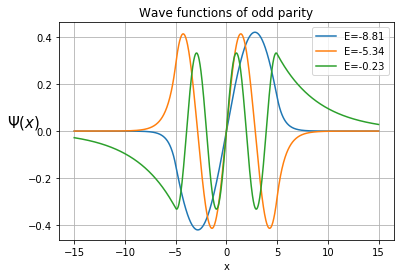

In [11]:
def PsiOdd (a,x,β,α): 
    if x<=(-a):
        return((-1*np.sqrt(β/(1+β*a))*np.sin(α*a)*np.exp(β*a)*np.exp(β*x)))
    elif -a<x<=a:
        return((np.sqrt(β/(1+β*a))*np.sin(α*x)))
    else:
        return(np.sqrt(β/(1+β*a))*np.sin(α*a)*np.exp(β*a)*np.exp(-1*β*x))
                

vfun = np.vectorize(PsiOdd)

x = np.linspace(-a-10,a+10, 1000)
plt.figure(1)
for i in range(len(Eodd)):
    psi=vfun(a,x,betasodd[i],alphasodd[i])
    plt.plot(x,psi,label='E=%.2f'%Eodd[i])
plt.legend(loc="upper right")
plt.title('Wave functions of odd parity')
plt.xlabel('x')
plt.ylabel('$\Psi(x)$', rotation='horizontal', fontsize = 15)
plt.grid()
plt.show()

# Defining even parity wave function over three regions 

if you are running this python file using a command prompt, please close down figure 1, only then figure 2 appears


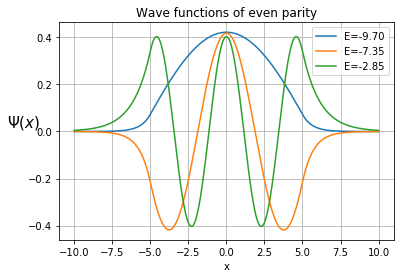

In [12]:
print('if you are running this python file using a command prompt, please close down figure 1, only then figure 2 appears')
def PsiEven (a,x,β,α): 
    if x<=(-a):
        return((np.sqrt(β/(1+β*a))*np.cos(α*a)*np.exp(β*a)*np.exp(β*x)))
    elif -a<x<=a:
        return((np.sqrt(β/(1+β*a))*np.cos(α*x)))
    else:
        return(np.sqrt(β/(1+β*a))*np.cos(α*a)*np.exp(β*a)*np.exp(-1*β*x))
                

vfun = np.vectorize(PsiEven)

x = np.linspace(-a-5, a+5, 1000)
plt.figure(2)
for i in range(len(Eeven)):
    psi=vfun(a,x,betaseven[i],alphaseven[i])
    plt.plot(x,psi,label='E=%.2f'%Eeven[i])
plt.legend(loc="upper right")
plt.title('Wave functions of even parity')
plt.xlabel('x')
plt.ylabel('$\Psi(x)$', rotation='horizontal', fontsize = 15)
plt.grid()
plt.show()